In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/content/myFinalDataset(edited version).xlsx")

In [3]:
# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Drop rows with missing label values
train_df = train_df.dropna(subset=['label'])

# Reset index after dropping rows
train_df.reset_index(drop=True, inplace=True)

# Convert label values to integers
train_df['label'] = train_df['label'].astype(int)
test_df['label'] = test_df['label'].astype(int)


In [4]:
# Define stopwords for Bangla language
stop_words = set(["আমি", "তুমি", "সে", "তিনি", "আমাদের", "তোমাদের", "তারা", "তাঁরা", "যার", "কে", "কেন", "কিভাবে", "কি", "কোথায়", "কখন", "কত", "কোন", "এবং", "অথবা", "তবে", "কিন্তু", "অবশ্য", "যদি", "হয়", "হয়ে", "ছিল", "হয়েছিল", "ছিলেন", "হয়েছিলেন", "থাকে", "থাকা", "থাকতে", "থাকবে", "থাকার", "থাকারে", "থাকারা", "থাকত", "পর্যন্ত", "যেহেতু", "কারণ", "অর্থাৎ", "উপর", "নিচে", "পেছনে", "আগে", "পরে", "প্রতি", "প্রথম", "দ্বিতীয়", "তৃতীয়", "একটি", "দুটি", "তিনটি", "চারটি", "পাঁচটি"])

In [8]:
# Tokenize text and convert to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])
X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

In [12]:
# Remove stopwords from the tokenized text
X_trai_seq = [[word_index for word_index in seq if word_index not in stop_words] for seq in X_train_seq]
X_tes_seq = [[word_index for word_index in seq if word_index not in stop_words] for seq in X_test_seq]


In [13]:
# Vectorize text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_text)
X_test_tfidf = tfidf_vectorizer.transform(test_text)

In [14]:
# Padding sequences
max_sequence_length_train = max([len(seq) for seq in X_train_seq])
max_sequence_length_test = max([len(seq) for seq in X_test_seq])
max_sequence_length = max(max_sequence_length_train, max_sequence_length_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)


40/40 [==============================] - 9s 229ms/step - loss: 0.3636 - accuracy: 0.8847
LSTM Test Accuracy: 0.8847376704216003


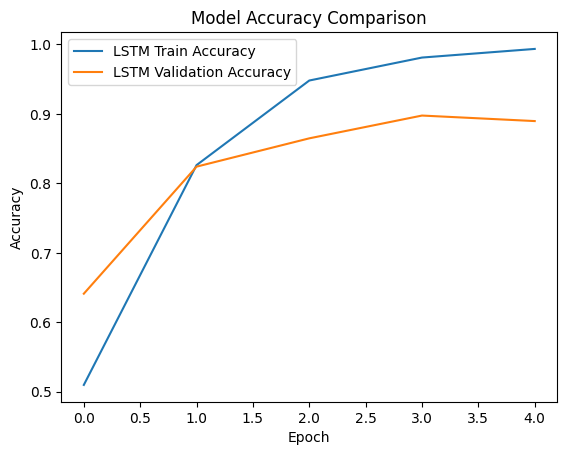

In [15]:
# Define LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(units=3, activation='softmax'))

# Compile LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
lstm_history = lstm_model.fit(X_train_pad, train_df['label'], epochs=5, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate LSTM model
lstm_evaluation = lstm_model.evaluate(X_test_pad, test_df['label'])
print("LSTM Test Accuracy:", lstm_evaluation[1])



# Plotting accuracy comparison
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
# plt.plot(lstm_with_tfidf_history.history['accuracy'], label='LSTM + TF-IDF Train Accuracy')
# plt.plot(lstm_with_tfidf_history.history['val_accuracy'], label='LSTM + TF-IDF Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40/40 [==============================] - 2s 39ms/step - loss: 0.4012 - accuracy: 0.8847
CNN Test Accuracy: 0.8847376704216003


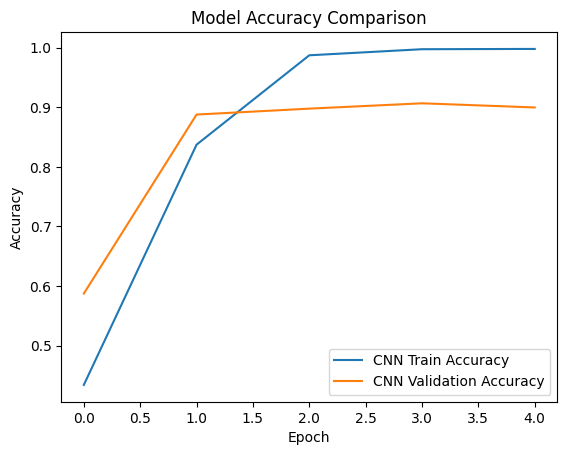

In [16]:
# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=3, activation='softmax'))

# Compile CNN model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(X_train_pad, train_df['label'], epochs=5, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate CNN model
cnn_evaluation = cnn_model.evaluate(X_test_pad, test_df['label'])
print("CNN Test Accuracy:", cnn_evaluation[1])


# Plotting accuracy comparison
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
# plt.plot(cnn_history_with_tfidf.history['accuracy'], label='CNN + TF-IDF Train Accuracy')
# plt.plot(cnn_history_with_tfidf.history['val_accuracy'], label='CNN + TF-IDF Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



40/40 [==============================] - 6s 151ms/step - loss: 0.4684 - accuracy: 0.8887
GRU Test Accuracy: 0.8887122273445129


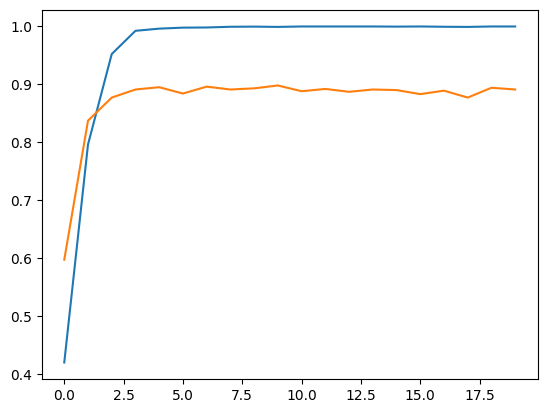

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split

# Define GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(units=3, activation='softmax'))

# Compile GRU model
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train GRU model
gru_history = gru_model.fit(X_train_pad, train_df['label'], epochs=20, batch_size=128, validation_split=0.2, verbose=0)

# Evaluate GRU model
gru_evaluation = gru_model.evaluate(X_test_pad, test_df['label'])
print("GRU Test Accuracy:", gru_evaluation[1])
plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')


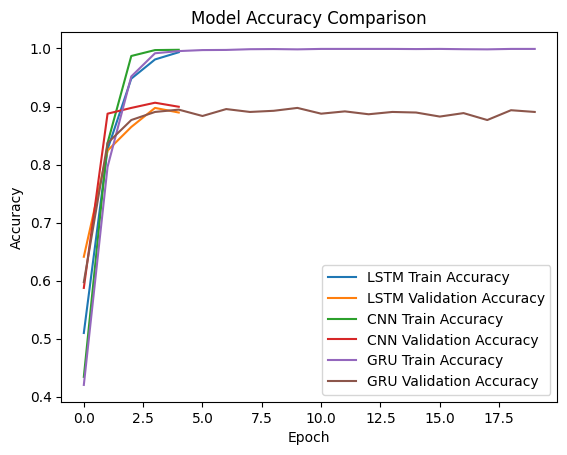

In [18]:
# Plotting accuracy comparison
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
## Predict probabilities for each class Manually

lstm_y_pred_prob = lstm_model.predict(X_test_pad)
cnn_y_pred_prob = cnn_model.predict(X_test_pad)
gru_y_pred_prob = gru_model.predict(X_test_pad)

# Choose the class with the highest probability

lstm_y_pred = np.argmax(lstm_y_pred_prob, axis=1)
cnn_y_pred = np.argmax(cnn_y_pred_prob, axis=1)
gru_y_pred = np.argmax(gru_y_pred_prob, axis=1)

# Calculate accuracy for each class

lstm_accuracy_class_0 = accuracy_score(test_df[test_df['label'] == 0]['label'], lstm_y_pred[test_df['label'] == 0])
lstm_accuracy_class_1 = accuracy_score(test_df[test_df['label'] == 1]['label'], lstm_y_pred[test_df['label'] == 1])
lstm_accuracy_class_2 = accuracy_score(test_df[test_df['label'] == 2]['label'], lstm_y_pred[test_df['label'] == 2])

cnn_accuracy_class_0 = accuracy_score(test_df[test_df['label'] == 0]['label'], cnn_y_pred[test_df['label'] == 0])
cnn_accuracy_class_1 = accuracy_score(test_df[test_df['label'] == 1]['label'], cnn_y_pred[test_df['label'] == 1])
cnn_accuracy_class_2 = accuracy_score(test_df[test_df['label'] == 2]['label'], cnn_y_pred[test_df['label'] == 2])


gru_accuracy_class_0 = accuracy_score(test_df[test_df['label'] == 0]['label'], gru_y_pred[test_df['label'] == 0])
gru_accuracy_class_1 = accuracy_score(test_df[test_df['label'] == 1]['label'], gru_y_pred[test_df['label'] == 1])
gru_accuracy_class_2 = accuracy_score(test_df[test_df['label'] == 2]['label'], gru_y_pred[test_df['label'] == 2])


print("LSTM Model:")
print("Accuracy for class 0 (depression):", lstm_accuracy_class_0)
print("Accuracy for class 1 (anxiety):", lstm_accuracy_class_1)
print("Accuracy for class 2 (neutral):", lstm_accuracy_class_2)

print("\nCNN Model:")
print("Accuracy for class 0 (depression):", cnn_accuracy_class_0)
print("Accuracy for class 1 (anxiety):", cnn_accuracy_class_1)
print("Accuracy for class 2 (neutral):", cnn_accuracy_class_2)

print("GRU Model:")
print("Accuracy for class 0 (depression):", gru_accuracy_class_0)
print("Accuracy for class 1 (anxiety):", gru_accuracy_class_1)
print("Accuracy for class 2 (neutral):", gru_accuracy_class_2)



40/40 [==============================] - 6s 141ms/step
LSTM Model:
Accuracy for class 0 (depression): 0.8640973630831643
Accuracy for class 1 (anxiety): 0.8987654320987655
Accuracy for class 2 (neutral): 0.8972222222222223

CNN Model:
Accuracy for class 0 (depression): 0.9249492900608519
Accuracy for class 1 (anxiety): 0.8469135802469135
Accuracy for class 2 (neutral): 0.8722222222222222
GRU Model:
Accuracy for class 0 (depression): 0.8843813387423936
Accuracy for class 1 (anxiety): 0.9012345679012346
Accuracy for class 2 (neutral): 0.8805555555555555


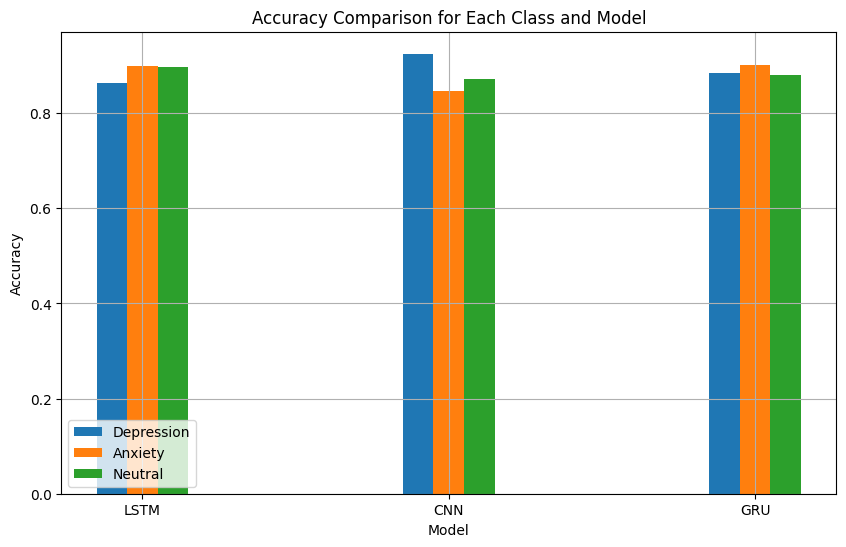

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy values for each class and model
depression_accuracies = [lstm_accuracy_class_0, cnn_accuracy_class_0, gru_accuracy_class_0]
anxiety_accuracies = [lstm_accuracy_class_1, cnn_accuracy_class_1, gru_accuracy_class_1]
neutral_accuracies = [lstm_accuracy_class_2, cnn_accuracy_class_2, gru_accuracy_class_2]

# Define the x locations for the groups
model_indices = np.arange(len(depression_accuracies))

# Width of the bars
bar_width = 0.1

# Plotting accuracy comparison for each class and model graphically
plt.figure(figsize=(10, 6))

# Plot bars for each class and model
plt.bar(model_indices - bar_width, depression_accuracies, bar_width, label='Depression')
plt.bar(model_indices, anxiety_accuracies, bar_width, label='Anxiety')
plt.bar(model_indices + bar_width, neutral_accuracies, bar_width, label='Neutral')

# Add labels and legend
plt.title('Accuracy Comparison for Each Class and Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(model_indices, ['LSTM', 'CNN', 'GRU'])
plt.legend(loc='lower left')  # Placing legend in the lower left corner
plt.grid(True)
plt.show()



In [21]:
# Classification Reports
print("LSTM Classification Report:")
print(classification_report(test_df['label'], lstm_y_pred))

print("CNN Classification Report:")
print(classification_report(test_df['label'], cnn_y_pred))

print("GRU Classification Report:")
print(classification_report(test_df['label'], gru_y_pred))





LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       493
           1       0.89      0.90      0.89       405
           2       0.88      0.90      0.89       360

    accuracy                           0.88      1258
   macro avg       0.88      0.89      0.89      1258
weighted avg       0.88      0.88      0.88      1258

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       493
           1       0.93      0.85      0.89       405
           2       0.90      0.87      0.89       360

    accuracy                           0.88      1258
   macro avg       0.89      0.88      0.89      1258
weighted avg       0.89      0.88      0.88      1258

GRU Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       493
           1       0.89      0.90      0.90    

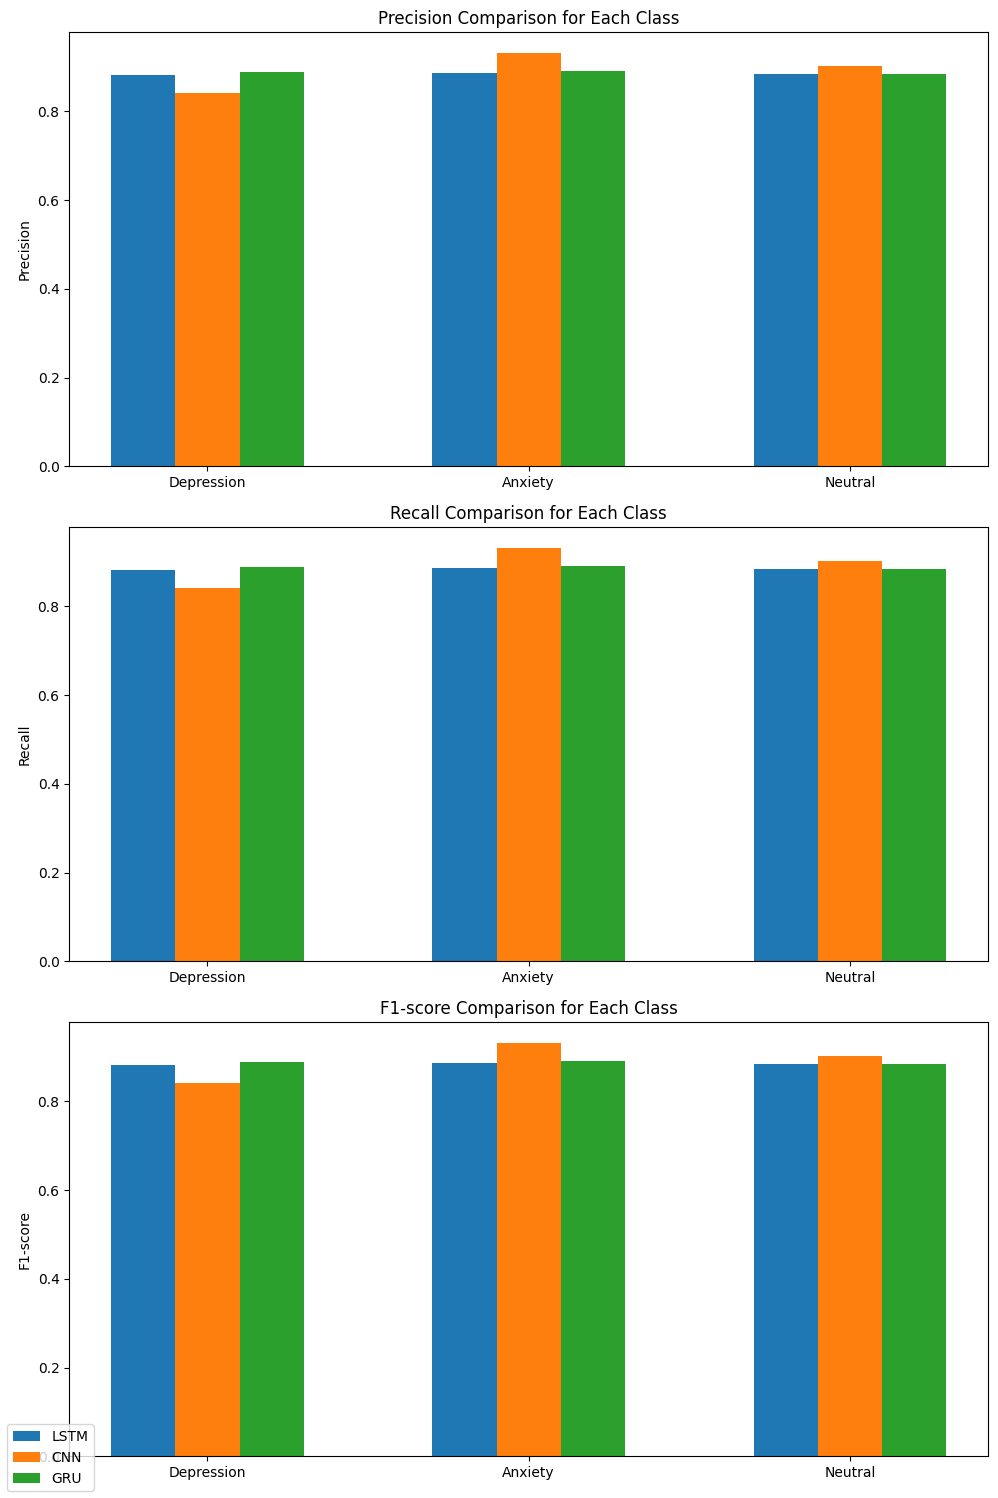

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate classification reports for each model
lstm_classification_report = classification_report(test_df['label'], lstm_y_pred, output_dict=True)
cnn_classification_report = classification_report(test_df['label'], cnn_y_pred, output_dict=True)
gru_classification_report = classification_report(test_df['label'], gru_y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class and model
classes = ['Depression', 'Anxiety', 'Neutral']
models = ['LSTM', 'CNN', 'GRU']

precisions = {
    'LSTM': [lstm_classification_report[str(i)]['precision'] for i in range(3)],
    'CNN': [cnn_classification_report[str(i)]['precision'] for i in range(3)],
    'GRU': [gru_classification_report[str(i)]['precision'] for i in range(3)]
}

recalls = {
    'LSTM': [lstm_classification_report[str(i)]['recall'] for i in range(3)],
    'CNN': [cnn_classification_report[str(i)]['recall'] for i in range(3)],
    'GRU': [gru_classification_report[str(i)]['recall'] for i in range(3)]
}

f1_scores = {
    'LSTM': [lstm_classification_report[str(i)]['f1-score'] for i in range(3)],
    'CNN': [cnn_classification_report[str(i)]['f1-score'] for i in range(3)],
    'GRU': [gru_classification_report[str(i)]['f1-score'] for i in range(3)]
}

# Plot precision, recall, and F1-score for each class and model
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

metrics = ['Precision', 'Recall', 'F1-score']
for i, metric in enumerate(metrics):
    axs[i].bar(np.arange(len(classes)) - 0.2, precisions[models[0]], width=0.2, label=classes[0])
    axs[i].bar(np.arange(len(classes)), precisions[models[1]], width=0.2, label=classes[1])
    axs[i].bar(np.arange(len(classes)) + 0.2, precisions[models[2]], width=0.2, label=classes[2])
    axs[i].set_ylabel(metric)
    axs[i].set_xticks(np.arange(len(classes)))
    axs[i].set_xticklabels(classes)
    axs[i].set_title(f'{metric} Comparison for Each Class')

# Place the legend in the lower left corner
fig.legend(models, loc='lower left')

plt.tight_layout()
plt.show()



In [23]:
# Accuracy Scores
print("LSTM Accuracy Score:", accuracy_score(test_df['label'], lstm_y_pred))
print("CNN Accuracy Score:", accuracy_score(test_df['label'], cnn_y_pred))
print("GRU Accuracy Score:", accuracy_score(test_df['label'], gru_y_pred))

LSTM Accuracy Score: 0.884737678855326
CNN Accuracy Score: 0.884737678855326
GRU Accuracy Score: 0.8887122416534181


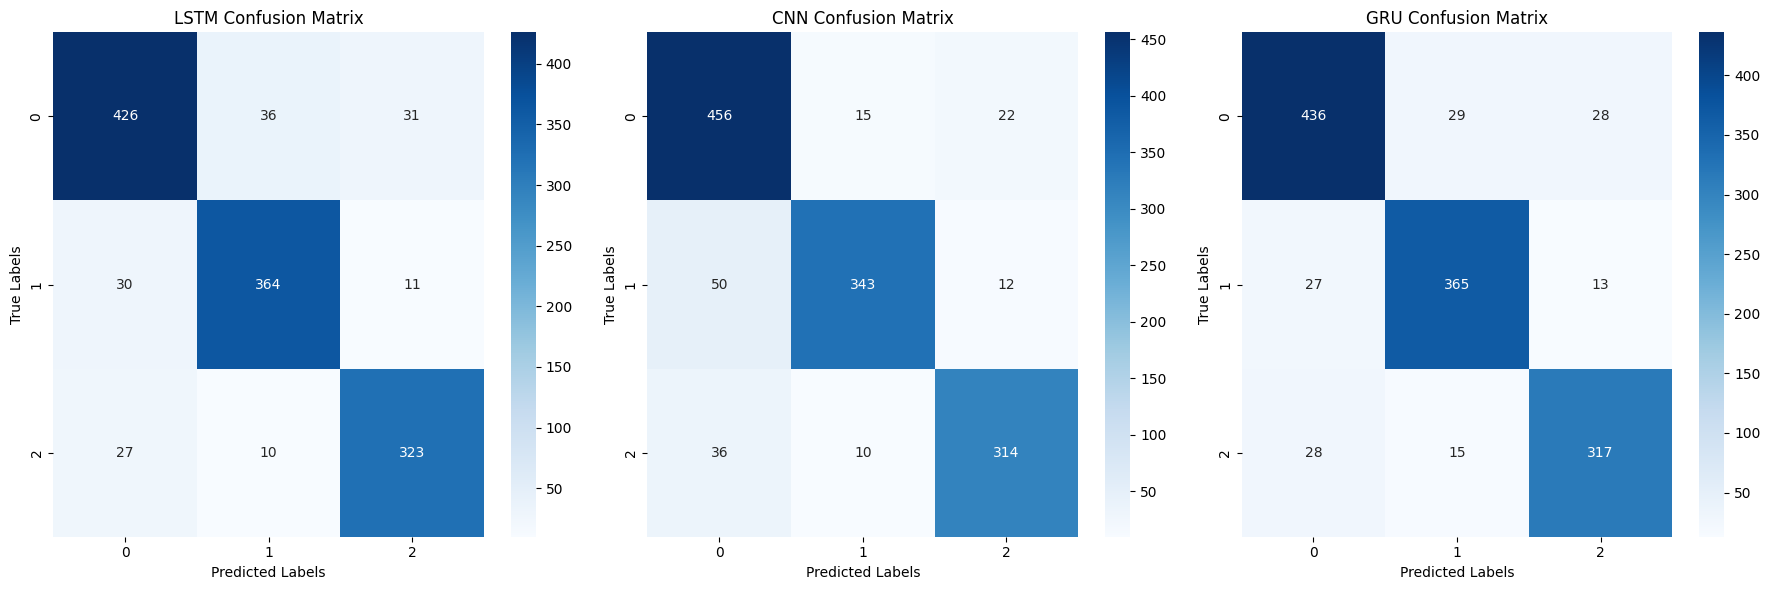

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrices for each model
lstm_conf_matrix = confusion_matrix(test_df['label'], lstm_y_pred)
cnn_conf_matrix = confusion_matrix(test_df['label'], cnn_y_pred)
gru_conf_matrix = confusion_matrix(test_df['label'], gru_y_pred)

# Plotting confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# LSTM confusion matrix
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', ax=axs[0], cmap='Blues')
axs[0].set_title('LSTM Confusion Matrix')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# CNN confusion matrix
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', ax=axs[1], cmap='Blues')
axs[1].set_title('CNN Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# GRU confusion matrix
sns.heatmap(gru_conf_matrix, annot=True, fmt='d', ax=axs[2], cmap='Blues')
axs[2].set_title('GRU Confusion Matrix')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()
